regions

Reading data from /Users/qasem/Dropbox/JasonANDQasem_SHARED/codes/gradients-rl-task/data/measures.csv


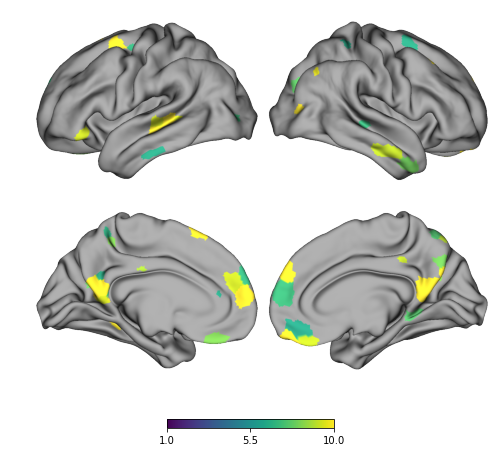

In [ ]:
from gradecc.compute.measures import get_measures
from gradecc.plot import plot_cortex
from gradecc.stats import rm_anova

df = get_measures()
df_stats = rm_anova(df)
df_stats_ecc = df_stats[df_stats.measure == 'eccentricity']

plot_cortex(df_stats_ecc, 'F', 'pvalue_corrected',
           color_range=(1, 10), layout='grid')

In [ ]:
sig_regions = df_stats_ecc[df_stats_ecc.fdr_significant == True].region.tolist()
sig_regions

['7Networks_LH_Cont_Cing_8',
 '7Networks_LH_Default_PFC_19',
 '7Networks_LH_Default_PFC_23',
 '7Networks_LH_Default_PFC_27',
 '7Networks_LH_Default_PFC_30',
 '7Networks_LH_Default_PFC_46',
 '7Networks_LH_Default_PFC_8',
 '7Networks_LH_Default_Temp_13',
 '7Networks_LH_Default_Temp_17',
 '7Networks_LH_Default_Temp_18',
 '7Networks_LH_Default_Temp_19',
 '7Networks_LH_Default_Temp_21',
 '7Networks_LH_Default_Temp_3',
 '7Networks_LH_Default_pCunPCC_1',
 '7Networks_LH_Default_pCunPCC_10',
 '7Networks_LH_Default_pCunPCC_12',
 '7Networks_LH_Default_pCunPCC_2',
 '7Networks_LH_Default_pCunPCC_3',
 '7Networks_LH_Default_pCunPCC_4',
 '7Networks_LH_Default_pCunPCC_5',
 '7Networks_LH_Default_pCunPCC_7',
 '7Networks_LH_DorsAttn_FEF_5',
 '7Networks_LH_DorsAttn_FEF_6',
 '7Networks_LH_Limbic_OFC_4',
 '7Networks_LH_Limbic_OFC_9',
 '7Networks_LH_Limbic_TempPole_10',
 '7Networks_LH_SalVentAttn_Med_13',
 '7Networks_LH_SalVentAttn_Med_16',
 '7Networks_LH_Vis_34',
 '7Networks_LH_Vis_5',
 '7Networks_RH_Cont_PF

plot


In [ ]:
import operator

rois = [1, 4, 7, 15, 17, 20, 27, 30, 45]
rois = operator.itemgetter(*rois)(sig_regions)
rois

('7Networks_LH_Default_PFC_19',
 '7Networks_LH_Default_PFC_30',
 '7Networks_LH_Default_Temp_13',
 '7Networks_LH_Default_pCunPCC_12',
 '7Networks_LH_Default_pCunPCC_3',
 '7Networks_LH_Default_pCunPCC_7',
 '7Networks_LH_SalVentAttn_Med_16',
 '7Networks_RH_Cont_PFCl_28',
 '7Networks_RH_Default_pCunPCC_7')

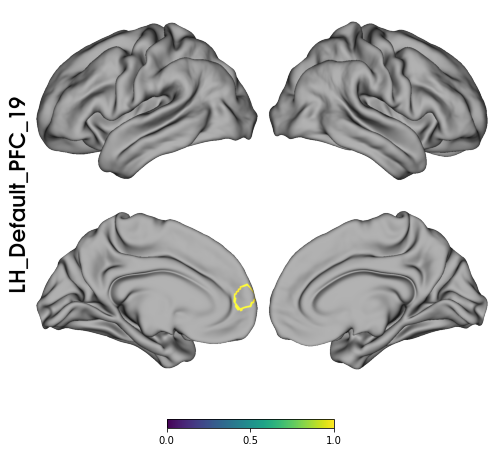

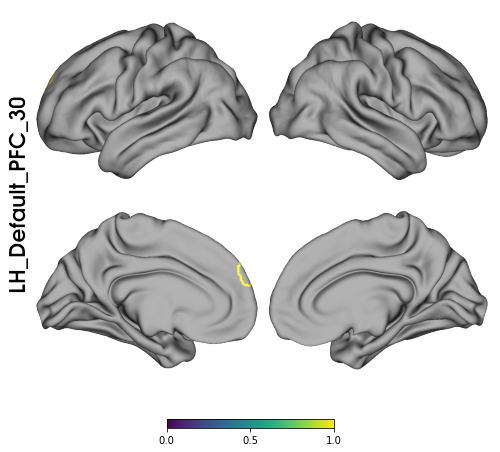

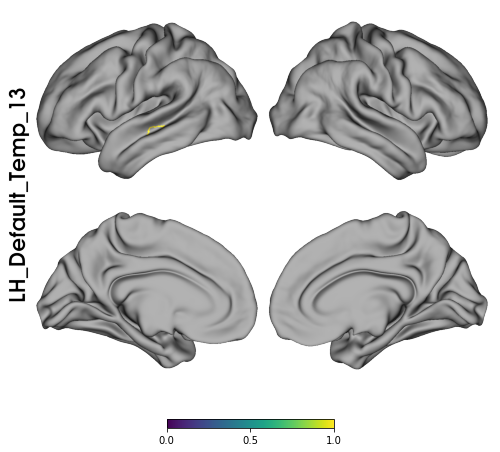

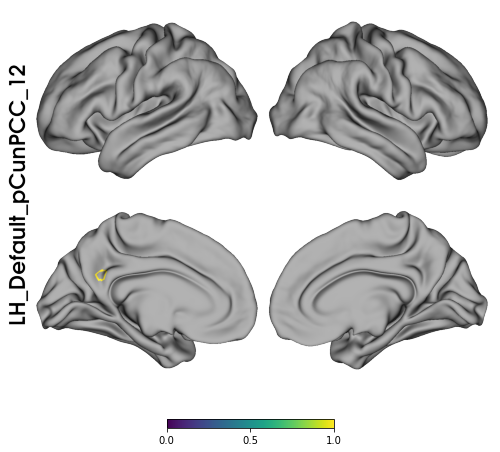

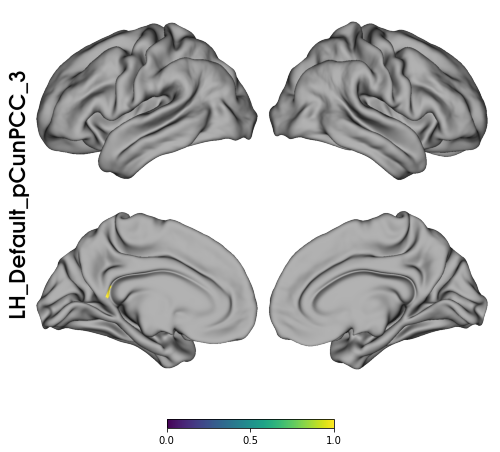

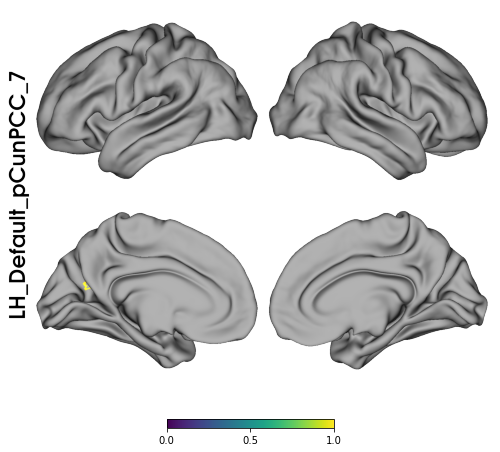

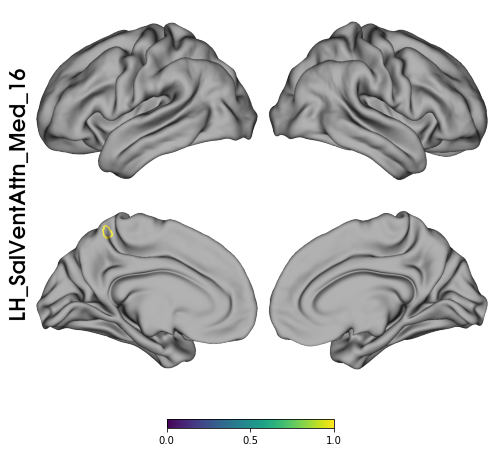

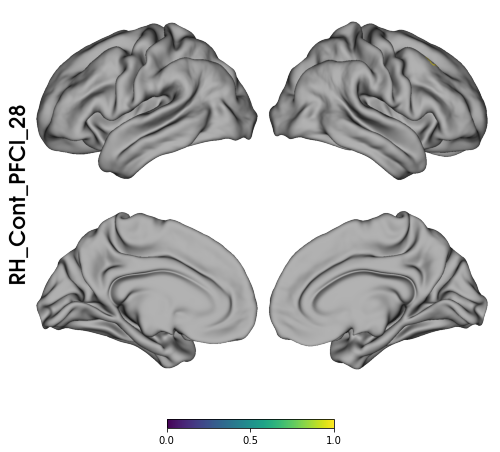

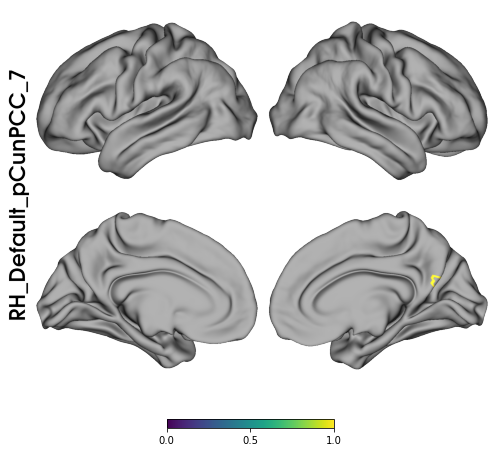

In [ ]:
from gradecc.plot.utils import spot_region
from gradecc.plot import plot_cortex

for sample_region in rois:
    plot_cortex(spot_region(sample_region), layout='grid',
           text=sample_region[10:], as_outline=True, save_figure=True)

Computing ttests...


100%|██████████| 998/998 [00:11<00:00, 90.06it/s]


Computing ttests...


 34%|███▍      | 340/998 [00:03<00:07, 88.45it/s]


KeyboardInterrupt: 

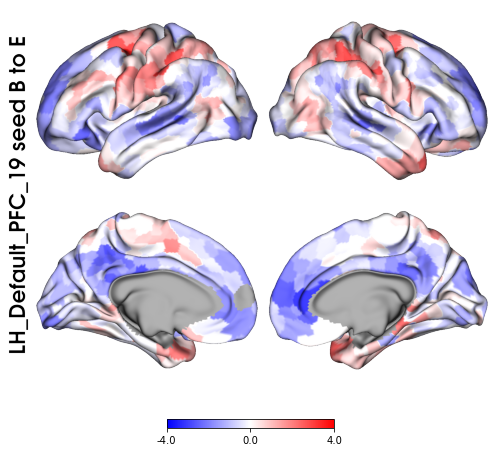

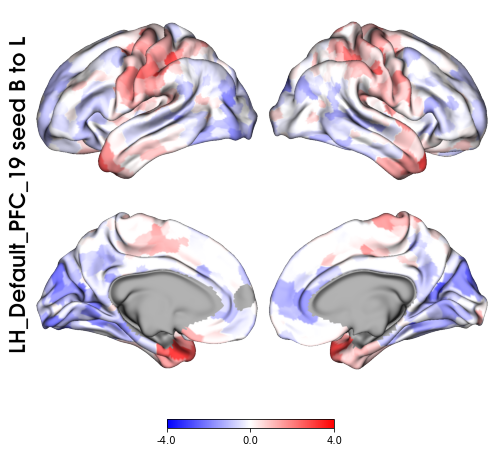

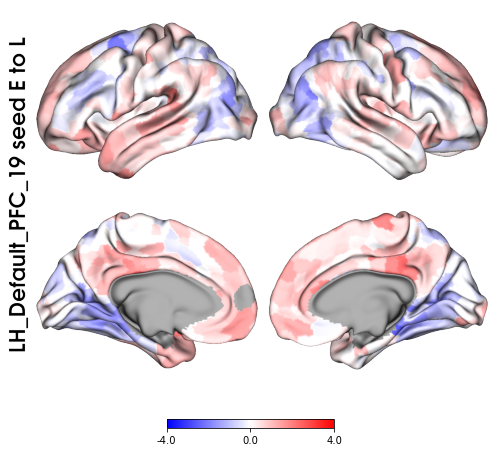

In [ ]:
from gradecc.stats.pairwise_ttests import seed_ttests
from gradecc.seed_conn import seed_connectivity

for sample_region in rois:
    df_seed = seed_connectivity(sample_region)
    df_seed_shift = seed_ttests(df_seed, filename=sample_region[10:])

    for pair in df_seed_shift.index.unique():
        text = sample_region[10:] + ' seed ' + pair[0][0].upper() + ' to ' + pair[1][0].upper()
        plot_cortex(df_seed_shift.loc[pair], 'tstat',
                   text=text, color_range=(-4, 4), color_map='bwr', layout='grid',
                   save_figure=True)